In [5]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v2 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    L = len(layer_dims)
    params = {}
    
    for l in range(1, L):
        params['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        params['b'+str(l)] = np.zeros((layer_dims[l], 1))
        assert(params['W'+str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(params['b'+str(l)].shape == (layer_dims[l], 1))
        
    return params

parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[ 0.]
 [ 0.]
 [ 0.]]


In [17]:
def linear_activation_forward(A_pre, W, b, activation):
    Z = np.dot(W, A_pre) + b    #
    if activation == 'sigmoid':
        A, activation_cache = sigmoid(Z)
    elif activation == 'relu':
        A, activation_cache = relu(Z)
    
    linear_cache = (A_pre, W, b)
    cache = (linear_cache, activation_cache)
    return A, cache

A_prev, W, b = linear_activation_forward_test_case()
#print 'A_prev.shape =', A_prev.shape
#print 'W.shape =', W.shape
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[ 0.96890023  0.11013289]]
With ReLU: A = [[ 3.43896131  0.        ]]


In [23]:
def L_model_forward(X, params):
    L = len(params) / 2
    caches = []
    A_pre = X
    for l in range(1, L):
        A, cache = linear_activation_forward(A_pre, params['W'+str(l)], params['b'+str(l)], 'relu')
        A_pre = A
        caches.append(cache)
    A_L, cache = linear_activation_forward(A_pre, params['W'+str(L)], params['b'+str(L)], 'sigmoid')
    caches.append(cache)
    return A_L, caches

X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[ 0.17007265  0.2524272 ]]
Length of caches list = 2


In [24]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -1.0 / m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL))
    cost = np.squeeze(cost)
    assert(cost.shape == ())    # cost should be a scaler
    return cost

Y, AL = compute_cost_test_case()
print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615


In [29]:
def linear_activation_backward(dA, cache, activation):
    #linear_cache = cache[0]
    #activation_cache = cache[1]
    linear_cache, activation_cache = cache    # more simple
    #A_pre = linear_cache[0]
    #W = linear_cache[1]
    #b = linear_cache[2]
    A_pre, W, b = linear_cache    # more simple
    m = dA.shape[1]
    
    if activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)
    elif activation == 'relu':
        dZ = relu_backward(dA, activation_cache)
    
    dW = 1.0 / m * np.dot(dZ, A_pre.T)
    db = 1.0 / m * np.sum(dZ, axis=1, keepdims=True)
    dA_pre = np.dot(W.T, dZ)
        
    assert(dA_pre.shape == A_pre.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    return dA_pre, dW, db

dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [33]:
def L_model_backward(AL, Y, caches):
    L = len(caches)
    #print 'L =', L
    m = Y.shape[1]
    grads = {}
    
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    # grads['dA'+str(L-1)], grads['dW'+str(L)], grads['db'+str(L)] = linear_activation_bacward(dAL, caches[L], activation='sigmoid')
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, caches[L-1], "sigmoid")    # cache is a list starting from 0
    for l in reversed(range(1, L)):    # need not compute dA0, dW0, db0
        #print 'l =', l
        current_cache = caches[l-1]
        grads['dA'+str(l)], grads['dW'+str(l)], grads['db'+str(l)] = linear_activation_backward(grads['dA'+str(l+1)], current_cache, activation = 'relu')
    
    return grads

AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

dW1 = [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]


In [34]:
def update_parameters(params, grads, learning_rate):
    L = len(params) / 2
    for l in range(L):
        params['W'+str(l+1)] = params['W'+str(l+1)] - learning_rate * grads['dW'+str(l+1)]
        params['b'+str(l+1)] = params['b'+str(l+1)] - learning_rate * grads['db'+str(l+1)]
    
    return params

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [45]:
def L_layer_model(X, Y, layer_dims, learning_rate=0.0075, iter_num=3000, print_cost=False):
    np.random.seed(1)
    costs = []
    
    params = initialize_parameters_deep(layer_dims)
    for i in range(iter_num):
        AL, caches = L_model_forward(X, params)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        params = update_parameters(params, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return params

In [39]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [40]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


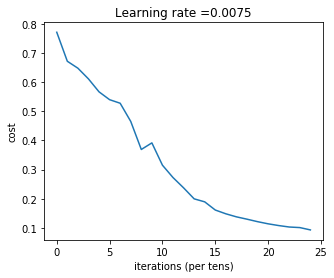

In [46]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, iter_num = 2500, print_cost = True)